<style>
h2{text-align: center; font-family: "Times New Roman";}
p{font-family: "Times New Roman"}
</style>
<h2>Mini Project - <u>Team Student Ensemble</u></h2>
<h2>Human Activity Detection using Our Dataset</h2>
<p>
Data Collected for activities: Walking, Walking Up, Walking Down, Laying, Sitting, Standing
<br> Device used: OnePlus Mobile Phone
<br> Software Used: Physics Toolbox Suite
<br> Initial Sampling Frequency: 200Hz
</p>

In [1]:
# import libraries
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import tsfel

<style>
h2{text-align: center; font-family: "Times New Roman";}
p{font-family: "Times New Roman"}
</style>
<p>Applying the filters such as Butterworth and median Filters, and preprocessing the data.</p>

In [2]:
def median_filter(x, med_filt_n): #creating a median filter function
 return sp.signal.medfilt(x,med_filt_n)

def butter_bandpass(lowcut, highcut, fs, order): #creating a butterworth bandpass filter function
    return signal.butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order): #  creating a butterworth bandpass filter function
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def filterpreprocess(df1, df2, df3, df4, activity, med_filt_n, lowcut, highcut, fs, order):
    '''
    This function takes in the four dataframes and the activity name, median filter number, lowcut, highcut, fs, and order.
    It then applies the median filter and butterworth bandpass filter to the data.
    It then resamples the data to 50Hz and interpolates to fill missing values.
    It then masks the data to obtain the data between 2s and 12s, so we have 10s of data at 50Hz.
    It then squares the data and plots the data.
    Input = 4 dataframes and the activity name
    Output = 4 dataframes that are filtered and resampled, and a plot of the data is plotted but not returned
    '''
    df1['aT (m/s^2)'] = median_filter(butter_bandpass_filter(df1['aT (m/s^2)']**2, lowcut, highcut, fs, order), med_filt_n) #applying the median filter and butterworth bandpass filter to the data
    df2['aT (m/s^2)'] = median_filter(butter_bandpass_filter(df2['aT (m/s^2)']**2, lowcut, highcut, fs, order), med_filt_n) #applying the median filter and butterworth bandpass filter to the data
    df3['aT (m/s^2)'] = median_filter(butter_bandpass_filter(df3['aT (m/s^2)']**2, lowcut, highcut, fs, order), med_filt_n) #applying the median filter and butterworth bandpass filter to the data
    df4['aT (m/s^2)'] = median_filter(butter_bandpass_filter(df4['aT (m/s^2)']**2, lowcut, highcut, fs, order), med_filt_n) #applying the median filter and butterworth bandpass filter to the data

    df1["time"] = pd.to_datetime(df1["time"], unit='s')  # Assuming 'time' is in seconds
    # Set the 'time' column as datetime entity and set it as the index
    df1.set_index("time", inplace=True)

    # Resample to 50Hz and interpolate to fill missing values
    df1_resampled = df1.resample('20ms').mean()  # 50Hz
    df1_resampled = df1_resampled.interpolate(method='linear') # Fill NaN values with linear interpolation

    # If needed, reset the index to have 'time' as a regular column
    df1_resampled.reset_index(inplace=True) # Reset index

    df2["time"] = pd.to_datetime(df2["time"], unit='s')  # Assuming 'time' is in seconds

    # Set the 'time' column as the index
    df2.set_index("time", inplace=True)

    # Resample to 50Hz and interpolate to fill missing values
    df2_resampled = df2.resample('20ms').mean()  # 50Hz
    df2_resampled = df2_resampled.interpolate(method='linear')

    # If needed, reset the index to have 'time' as a regular column
    df2_resampled.reset_index(inplace=True)

    df3["time"] = pd.to_datetime(df3["time"], unit='s')  # Assuming 'time' is in seconds

    # Set the 'time' column as the index
    df3.set_index("time", inplace=True)

    # Resample to 50Hz and interpolate to fill missing values
    df3_resampled = df3.resample('20ms').mean()  # 50Hz
    df3_resampled = df3_resampled.interpolate(method='linear')

    # If needed, reset the index to have 'time' as a regular column
    df3_resampled.reset_index(inplace=True)

    df4["time"] = pd.to_datetime(df4["time"], unit='s')  # Assuming 'time' is in seconds

    # Set the 'time' column as the index
    df4.set_index("time", inplace=True)

    # Resample to 50Hz and interpolate to fill missing values
    df4_resampled = df4.resample('20ms').mean()  # 50Hz
    df4_resampled = df4_resampled.interpolate(method='linear')

    # If needed, reset the index to have 'time' as a regular column
    df4_resampled.reset_index(inplace=True)

    mask1 = (df1_resampled['time'] >= '1970-01-01 00:00:02.000') & (df1_resampled['time'] <= '1970-01-01 00:00:12.000') #masking the data to obtain the data between 2s and 12s, so we have 10s of data at 50Hz 
    mask2 = (df2_resampled['time'] >= '1970-01-01 00:00:02.000') & (df2_resampled['time'] <= '1970-01-01 00:00:12.000')
    mask3 = (df3_resampled['time'] >= '1970-01-01 00:00:02.000') & (df3_resampled['time'] <= '1970-01-01 00:00:12.000')
    mask4 = (df4_resampled['time'] >= '1970-01-01 00:00:02.000') & (df4_resampled['time'] <= '1970-01-01 00:00:12.000')

    # Apply the mask to the DataFrame to get the truncated DataFrame
    truncated_df1 = df1_resampled[mask1]
    plt.plot(truncated_df1['time'], truncated_df1['aT (m/s^2)'], label = "df1") #plotting the data

    truncated_df2 = df2_resampled[mask2]
    plt.plot(truncated_df2['time'], truncated_df2['aT (m/s^2)'], label = "df2")

    truncated_df3 = df3_resampled[mask3]
    plt.plot(truncated_df3['time'], truncated_df3['aT (m/s^2)'], label = "df3")

    truncated_df4 = df4_resampled[mask4]
    plt.plot(truncated_df4['time'], truncated_df4['aT (m/s^2)'], label = "df4")

    # Labeling the axes and providing a title
    plt.xlabel('Time')
    plt.ylabel('Net Acceleration Squared')
    plt.title('Time vs Net Acceleration Squared for ' + activity + ' Activity')
    plt.legend()

    # Show the plot
    plt.show()

    return truncated_df1, truncated_df2, truncated_df3, truncated_df4, [activity]*4

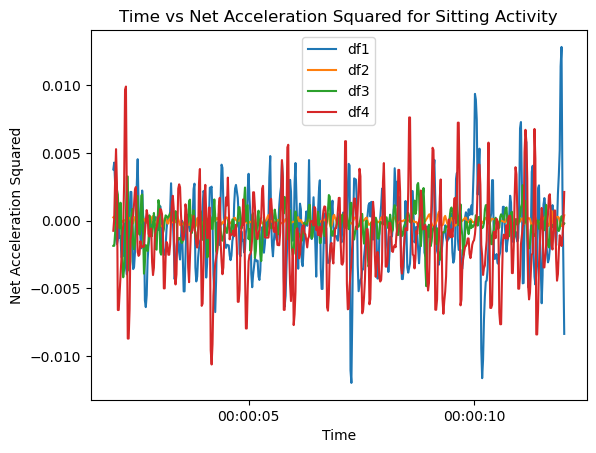

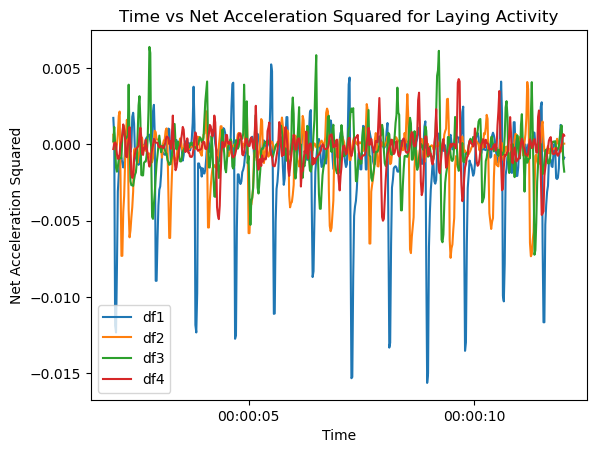

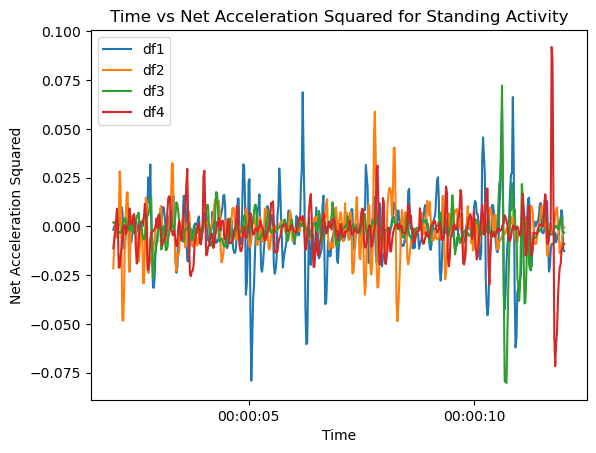

c:\Users\jaide\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


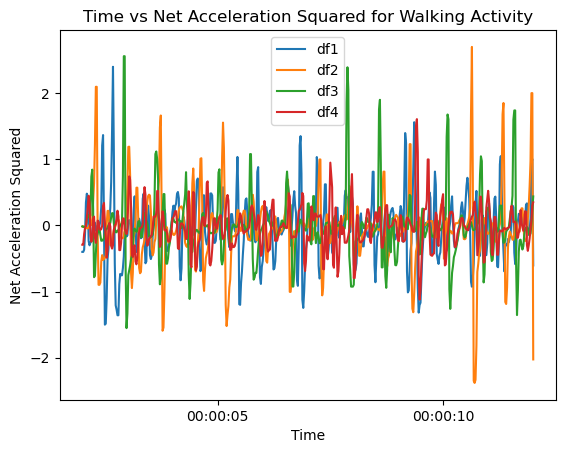

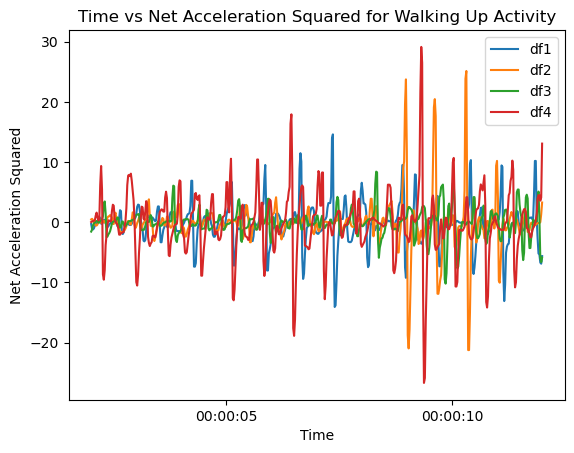

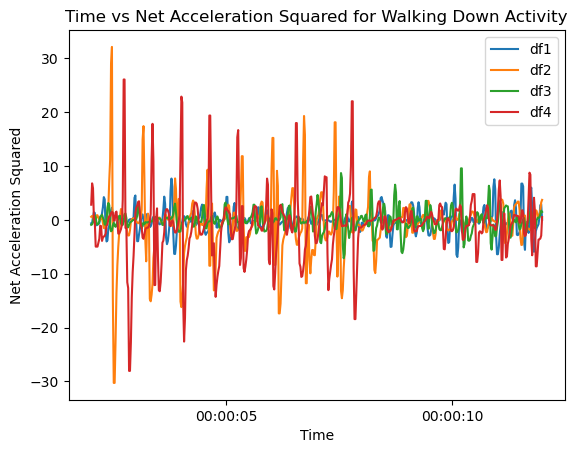

In [3]:
df1 = pd.read_csv('Sitting1.csv')
df2 = pd.read_csv('Sitting2.csv')
df3 = pd.read_csv('Sitting3.csv')
df4 = pd.read_csv('Sitting4.csv')
df5 = pd.read_csv("Laying1.csv")
df6 = pd.read_csv("Laying2.csv")
df7 = pd.read_csv("Laying3.csv")
df8 = pd.read_csv("Laying4.csv")
df9 = pd.read_csv("Standing1.csv")
df10 = pd.read_csv("Standing2.csv")
df11 = pd.read_csv("Standing3.csv")
df12 = pd.read_csv("Standing4.csv")
df13 = pd.read_csv("Walking1.csv")
df14 = pd.read_csv("Walking2.csv")
df15 = pd.read_csv("Walking3.csv")
df16 = pd.read_csv("Walking4.csv")
df17 = pd.read_csv("WalkingUp1.csv")
df18 = pd.read_csv("WalkingUp2.csv")
df19 = pd.read_csv("WalkingUp3.csv")
df20 = pd.read_csv("WalkingUp4.csv")
df21 = pd.read_csv("WalkingDown1.csv")
df22 = pd.read_csv("WalkingDown2.csv")
df23 = pd.read_csv("WalkingDown3.csv")
df24 = pd.read_csv("WalkingDown4.csv")
truncated_df1, truncated_df2, truncated_df3, truncated_df4, lables_sitting = filterpreprocess(df1, df2, df3, df4, "Sitting", 15, 3, 20, 200, 1)
truncated_df5, truncated_df6, truncated_df7, truncated_df8, labels_laying = filterpreprocess(df5, df6, df7, df8, "Laying", 15, 3, 20, 200, 1)
truncated_df9, truncated_df10, truncated_df11, truncated_df12, labels_standing = filterpreprocess(df9, df10, df11, df12, "Standing", 15, 3, 20, 200, 1)
truncated_df13, truncated_df14, truncated_df15, truncated_df16, labels_walking = filterpreprocess(df13, df14, df15, df16, "Walking", 15, 3, 20, 200, 1)
truncated_df17, truncated_df18, truncated_df19, truncated_df20, labels_walkingup = filterpreprocess(df17, df18, df19, df20, "Walking Up", 15, 3, 20, 200, 1)
truncated_df21, truncated_df22, truncated_df23, truncated_df24, labels_walkingdown = filterpreprocess(df21, df22, df23, df24, "Walking Down", 15, 3, 20, 200, 1)

In [4]:
arr1 = np.array(truncated_df1['aT (m/s^2)'])
arr2 = np.array(truncated_df2['aT (m/s^2)'])
arr3 = np.array(truncated_df3['aT (m/s^2)'])
arr4 = np.array(truncated_df4['aT (m/s^2)'])
arr5 = np.array(truncated_df5['aT (m/s^2)'])
arr6 = np.array(truncated_df6['aT (m/s^2)'])
arr7 = np.array(truncated_df7['aT (m/s^2)'])
arr8 = np.array(truncated_df8['aT (m/s^2)'])
arr9 = np.array(truncated_df9['aT (m/s^2)'])
arr10 = np.array(truncated_df10['aT (m/s^2)'])
arr11 = np.array(truncated_df11['aT (m/s^2)'])
arr12 = np.array(truncated_df12['aT (m/s^2)'])
arr13 = np.array(truncated_df13['aT (m/s^2)'])
arr14 = np.array(truncated_df14['aT (m/s^2)'])
arr15 = np.array(truncated_df15['aT (m/s^2)'])
arr16 = np.array(truncated_df16['aT (m/s^2)'])
arr17 = np.array(truncated_df17['aT (m/s^2)'])
arr18 = np.array(truncated_df18['aT (m/s^2)'])
arr19 = np.array(truncated_df19['aT (m/s^2)'])
arr20 = np.array(truncated_df20['aT (m/s^2)'])
arr21 = np.array(truncated_df21['aT (m/s^2)'])
arr22 = np.array(truncated_df22['aT (m/s^2)'])
arr23 = np.array(truncated_df23['aT (m/s^2)'])
arr24 = np.array(truncated_df24['aT (m/s^2)'])

combined_arr = np.array([arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8, arr9, arr10, arr11, arr12, arr13, arr14, arr15, arr16, arr17, arr18, arr19, arr20, arr21, arr22, arr23, arr24]) #combining all the arrays into one array
arr_labels = ['Sitting', 'Sitting', 'Sitting', 'Sitting', 'Laying', 'Laying', 'Laying', 'Laying', 'Standing', 'Standing', 'Standing', 'Standing', 'Walking', 'Walking', 'Walking', 'Walking', 'WalkingUp', 'WalkingUp', 'WalkingUp', 'WalkingUp', 'WalkingDown', 'WalkingDown', 'WalkingDown', 'WalkingDown'] #creating an array of labels for the data

In [5]:
df_final = pd.DataFrame(combined_arr)
# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()
features_lis = [] #creating an empty list to store the features
for i in range(len(combined_arr)):
    features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list


*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\jaide\AppData\Local\Temp\ipykernel_20552\3759603661.py:6: UserWarning: Using default sampling frequency set in configuration file.
  features_lis.append(np.array(tsfel.time_series_features_extractor(cfg, combined_arr[i]))) #extracting the features from the data and appending them to the list



*** Feature extraction finished ***


c:\Users\jaide\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix for Prediction on Our Data')

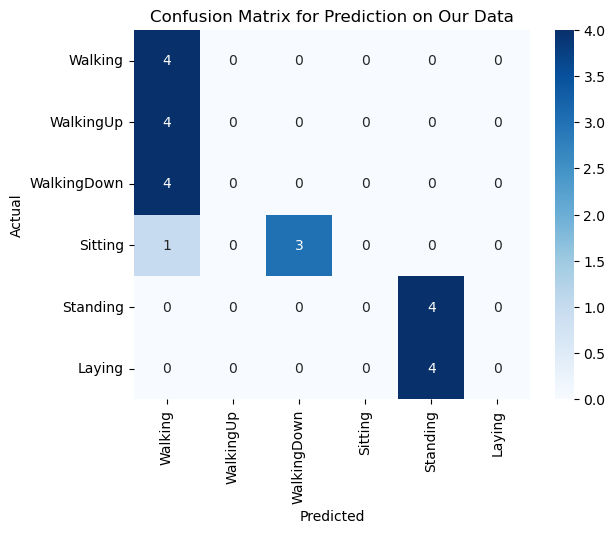

In [6]:
features_arr = np.array(features_lis).reshape(24, 384) #reshaping the list into an array
filename = 'Final Model\\pca_features_A1.sav' #loading the pca model
pca_model = pickle.load(open(filename, 'rb')) #loading the pca model
pca_features_arr = pca_model.transform(features_arr) #transforming the features array using the pca model
filename = 'Final Model\\final_tree_A1.sav' #loading the tree model
tree_model = pickle.load(open(filename, 'rb')) #loading the tree model
y_pred = list(tree_model.predict(pca_features_arr)) #predicting the labels of the data using the tree model
classes = {1:"Walking",2:"WalkingUp",3:"WalkingDown",4:"Sitting",5:"Standing",6:"Laying"} #creating a dictionary of the labels
for i in range(len(y_pred)):
    y_pred[i] = classes[y_pred[i]] #replacing the numerical labels with the actual labels
cm = confusion_matrix(arr_labels, y_pred) #creating a confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=[classes[element] for element in tree_model.classes_], yticklabels=[classes[element] for element in tree_model.classes_]) #plotting the confusion matrix
plt.xlabel('Predicted') #labeling the axes
plt.ylabel('Actual') #labeling the axes
plt.title('Confusion Matrix for Prediction on Our Data') #title of the plot

In [7]:
print("The accuracy of the model on Our Data is",accuracy_score(y_pred, arr_labels)*100, "%") #calculating the accuracy score of the model on our data
print(classification_report(y_pred, arr_labels, zero_division = 0)) # Printing the classification report

The accuracy of the model on Our Data is 33.33333333333333 %
              precision    recall  f1-score   support

      Laying       1.00      0.31      0.47        13
     Sitting       0.00      0.00      0.00         0
    Standing       0.00      0.00      0.00         3
     Walking       0.00      0.00      0.00         0
 WalkingDown       1.00      0.50      0.67         8
   WalkingUp       0.00      0.00      0.00         0

    accuracy                           0.33        24
   macro avg       0.33      0.13      0.19        24
weighted avg       0.88      0.33      0.48        24



<style>
p{font-family:"Times New Roman"}
h4{font-family:"Times New Roman"}
</style>
<h4>Conclusion</h4>

<p>We can observe that the data captured by us has an accuracy of 33% (better than dummy) and after the filters are applied, it is 16%. The reasons may be:
<br>-> The sensor configurations may be different (the sensitivity, the inbuilt filters and the range of operations)
<br>-> The data may be because of the difference in positioning of the phone compared to that of a watch
<br>-> The difference in walking style (minor reason)
<br>-> Slightly different implementation of the filters for cancelling the background noise
<br>-> Usage of a different unit system? (metric v/s feet)
</p>
